<a href="https://colab.research.google.com/github/remixwithkj/Backupmac/blob/main/MOA_Customer_Segements_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall of America (MoA) Case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
moa_analytics_df = pd.read_csv('moa_analytics.csv')

In [ ]:
moa_analytics_df.head(10)

,device,session_date,apple_flag,entry_time,exit_time,duration,avg_time_session_update,distinct_ap,distinct_sessions,total_updates,...,session_updates_3_S,session_updates_3_SE,session_updates_3_SW,session_updates_3_W,session_updates_4_E,session_updates_4_NE,session_updates_4_S,session_updates_4_SE,session_updates_outside,session_updates_entrance
0,device:00:ee:bd:c2:2a:2b,11/8/2015,0,2015-11-08 12:17:15.25,2015-11-08 12:23:53.57,398.0,199.0,1,1,3,...,0,0,0,3,0,0,0,0,0,3
1,device:00:ee:bd:c2:2c:93,3/26/2016,0,2016-03-26 14:13:24.45,2016-03-26 18:57:53.54,17069.0,107.0,75,35,160,...,0,0,0,0,0,0,0,0,0,16
2,device:00:ee:bd:c2:2e:ba,11/21/2015,0,2015-11-21 14:17:56.76,2015-11-21 17:06:16.50,10100.0,124.0,33,7,82,...,0,0,0,9,0,0,0,0,3,8
3,device:00:ee:bd:c2:37:17,11/21/2015,0,2015-11-21 20:35:30.40,2015-11-22 00:22:01.44,13591.0,109.0,29,13,125,...,0,0,0,0,80,20,0,2,6,30
4,device:00:ee:bd:c2:37:17,3/21/2016,0,2016-03-21 17:49:45.72,2016-03-21 17:57:55.42,490.0,122.0,3,2,5,...,0,0,0,0,0,0,0,0,1,4
5,device:00:ee:bd:c2:49:ef,1/2/2016,0,2016-01-02 22:41:38.00,2016-01-02 22:56:03.03,865.0,45.0,17,2,20,...,8,0,6,6,0,0,0,0,3,2
6,device:00:ee:bd:c2:67:2a,12/6/2015,0,2015-12-06 14:08:26.79,2015-12-06 15:03:54.57,3328.0,89.0,25,2,38,...,0,0,0,0,2,0,9,5,0,2
7,device:00:ee:bd:c2:67:2a,2/13/2016,0,2016-02-13 11:32:12.51,2016-02-13 20:28:02.12,32150.0,175.0,31,43,184,...,9,0,0,0,0,0,0,0,0,3
8,device:00:ee:bd:c2:67:2a,2/20/2016,0,2016-02-20 15:40:39.14,2016-02-20 20:25:57.48,17118.0,178.0,22,14,97,...,5,0,0,0,0,0,0,0,0,5
9,device:00:f4:6f:6b:9d:eb,12/5/2015,0,2015-12-05 12:52:04.82,2015-12-05 17:39:52.48,17268.0,134.0,71,10,129,...,1,0,0,0,0,0,0,0,0,23


In [ ]:
moa_analytics_df.shape

(12621, 108)

In [ ]:
moa_analytics_df.iloc[:, 0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12621 entries, 0 to 12620
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   device                     12621 non-null  object 
 1   session_date               12621 non-null  object 
 2   apple_flag                 12621 non-null  int64  
 3   entry_time                 12621 non-null  object 
 4   exit_time                  12621 non-null  object 
 5   duration                   12614 non-null  float64
 6   avg_time_session_update    12614 non-null  float64
 7   distinct_ap                12621 non-null  int64  
 8   distinct_sessions          12621 non-null  int64  
 9   total_updates              12621 non-null  int64  
 10  time_per_distinct_ap       12614 non-null  float64
 11  distinct_sections_visited  12621 non-null  int64  
 12  distinct_levels_visited    12621 non-null  int64  
 13  weekend_flag               12621 non-null  int

### Data Preparation

In [ ]:
moa_analytics_df['session_date'] = pd.to_datetime(moa_analytics_df['session_date'],
                                                  format="%m/%d/%Y")

In [ ]:
moa_analytics_df.head(10)

,device,session_date,apple_flag,entry_time,exit_time,duration,avg_time_session_update,distinct_ap,distinct_sessions,total_updates,...,session_updates_3_S,session_updates_3_SE,session_updates_3_SW,session_updates_3_W,session_updates_4_E,session_updates_4_NE,session_updates_4_S,session_updates_4_SE,session_updates_outside,session_updates_entrance
0,device:00:ee:bd:c2:2a:2b,2015-11-08,0,2015-11-08 12:17:15.25,2015-11-08 12:23:53.57,398.0,199.0,1,1,3,...,0,0,0,3,0,0,0,0,0,3
1,device:00:ee:bd:c2:2c:93,2016-03-26,0,2016-03-26 14:13:24.45,2016-03-26 18:57:53.54,17069.0,107.0,75,35,160,...,0,0,0,0,0,0,0,0,0,16
2,device:00:ee:bd:c2:2e:ba,2015-11-21,0,2015-11-21 14:17:56.76,2015-11-21 17:06:16.50,10100.0,124.0,33,7,82,...,0,0,0,9,0,0,0,0,3,8
3,device:00:ee:bd:c2:37:17,2015-11-21,0,2015-11-21 20:35:30.40,2015-11-22 00:22:01.44,13591.0,109.0,29,13,125,...,0,0,0,0,80,20,0,2,6,30
4,device:00:ee:bd:c2:37:17,2016-03-21,0,2016-03-21 17:49:45.72,2016-03-21 17:57:55.42,490.0,122.0,3,2,5,...,0,0,0,0,0,0,0,0,1,4
5,device:00:ee:bd:c2:49:ef,2016-01-02,0,2016-01-02 22:41:38.00,2016-01-02 22:56:03.03,865.0,45.0,17,2,20,...,8,0,6,6,0,0,0,0,3,2
6,device:00:ee:bd:c2:67:2a,2015-12-06,0,2015-12-06 14:08:26.79,2015-12-06 15:03:54.57,3328.0,89.0,25,2,38,...,0,0,0,0,2,0,9,5,0,2
7,device:00:ee:bd:c2:67:2a,2016-02-13,0,2016-02-13 11:32:12.51,2016-02-13 20:28:02.12,32150.0,175.0,31,43,184,...,9,0,0,0,0,0,0,0,0,3
8,device:00:ee:bd:c2:67:2a,2016-02-20,0,2016-02-20 15:40:39.14,2016-02-20 20:25:57.48,17118.0,178.0,22,14,97,...,5,0,0,0,0,0,0,0,0,5
9,device:00:f4:6f:6b:9d:eb,2015-12-05,0,2015-12-05 12:52:04.82,2015-12-05 17:39:52.48,17268.0,134.0,71,10,129,...,1,0,0,0,0,0,0,0,0,23


In [ ]:
moa_analytics_df.iloc[:, :18].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12621 entries, 0 to 12620
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   device                     12621 non-null  object        
 1   session_date               12621 non-null  datetime64[ns]
 2   apple_flag                 12621 non-null  int64         
 3   entry_time                 12621 non-null  object        
 4   exit_time                  12621 non-null  object        
 5   duration                   12614 non-null  float64       
 6   avg_time_session_update    12614 non-null  float64       
 7   distinct_ap                12621 non-null  int64         
 8   distinct_sessions          12621 non-null  int64         
 9   total_updates              12621 non-null  int64         
 10  time_per_distinct_ap       12614 non-null  float64       
 11  distinct_sections_visited  12621 non-null  int64         
 12  dist

### Are there any missing Values?

In [ ]:
nan_cols = moa_analytics_df.columns[moa_analytics_df.isnull().any()]

In [ ]:
moa_analytics_df[nan_cols].isnull().sum()

duration                   7
avg_time_session_update    7
time_per_distinct_ap       7
time_0                     2
time_1                     2
time_2                     2
time_3                     1
time_0_E                   1
time_0_SE                  1
time_1_E                   1
time_1_SE                  1
time_2_SW                  1
time_2_W                   1
time_3_E                   1
time_outside               3
time_entrance              2
dtype: int64

### Dropping the missing values

In [ ]:
moa_analytics_df = moa_analytics_df.dropna()

In [ ]:
moa_analytics_df.columns[moa_analytics_df.isnull().any()]

Index([], dtype='object')

### We have session data for what duration?

In [ ]:
moa_analytics_df.session_date.min(), moa_analytics_df.session_date.max()

(Timestamp('2015-10-15 00:00:00'), Timestamp('2016-04-03 00:00:00'))

### We will take data for only 2016

In [ ]:
moa_analytics_2016_df = moa_analytics_df[moa_analytics_df.session_date >= '2016-01-01']

In [ ]:
moa_analytics_2016_df.shape

(7702, 108)

## Aggregate Statistics

- Number of visits by each customer
- Median duration spent in the mall

In [ ]:
visits_duration_df = (moa_analytics_2016_df.groupby('device')
                      .agg({'device':'count', 'duration':'sum'} )
                      .rename(columns={'device':'num_visits','duration':'mean_duration'})
                      .reset_index())

In [ ]:
visits_duration_df.shape

(3533, 3)

In [ ]:
visits_duration_df.sample(10)

,device,num_visits,mean_duration
2024,device:a0:91:69:a6:d8:61,11,27079.0
1355,device:70:3e:ac:5d:be:64,2,2533.0
3376,device:fc:c2:de:94:c5:ec,1,1110.0
2502,device:c8:1e:e7:79:7b:8b,12,300812.0
1437,device:74:1b:b2:6d:92:fc,1,11846.0
2139,device:a4:c4:94:bd:a6:23,35,757869.0
2435,device:c0:bd:d1:ea:b1:0e,1,30507.0
3350,device:fc:c2:de:11:a4:68,1,421.0
46,device:00:ae:fa:ea:ea:3f,1,8223.0
1196,device:68:d9:3c:d7:5b:ca,1,6650.0


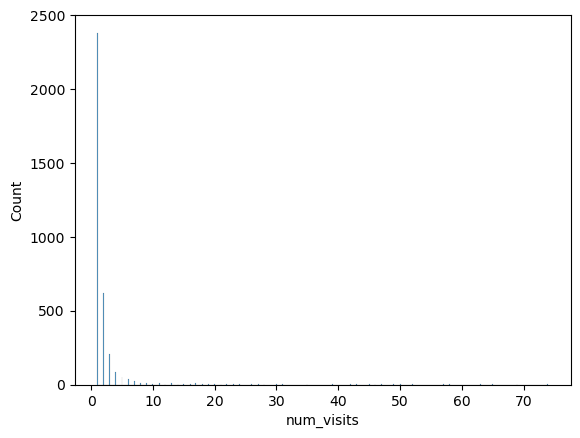

In [ ]:
sn.histplot( visits_duration_df.num_visits );

<Axes: xlabel='mean_duration', ylabel='Density'>

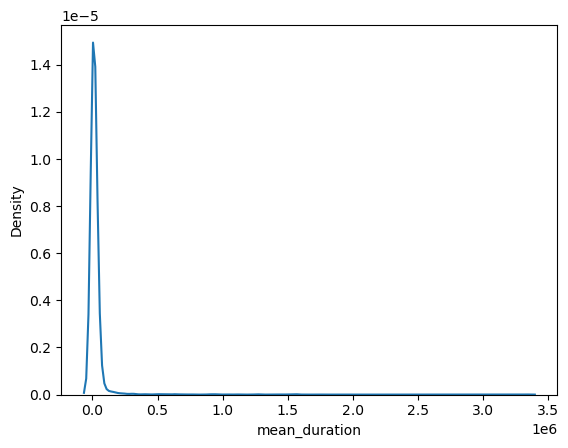

In [ ]:
sn.kdeplot( visits_duration_df.mean_duration )

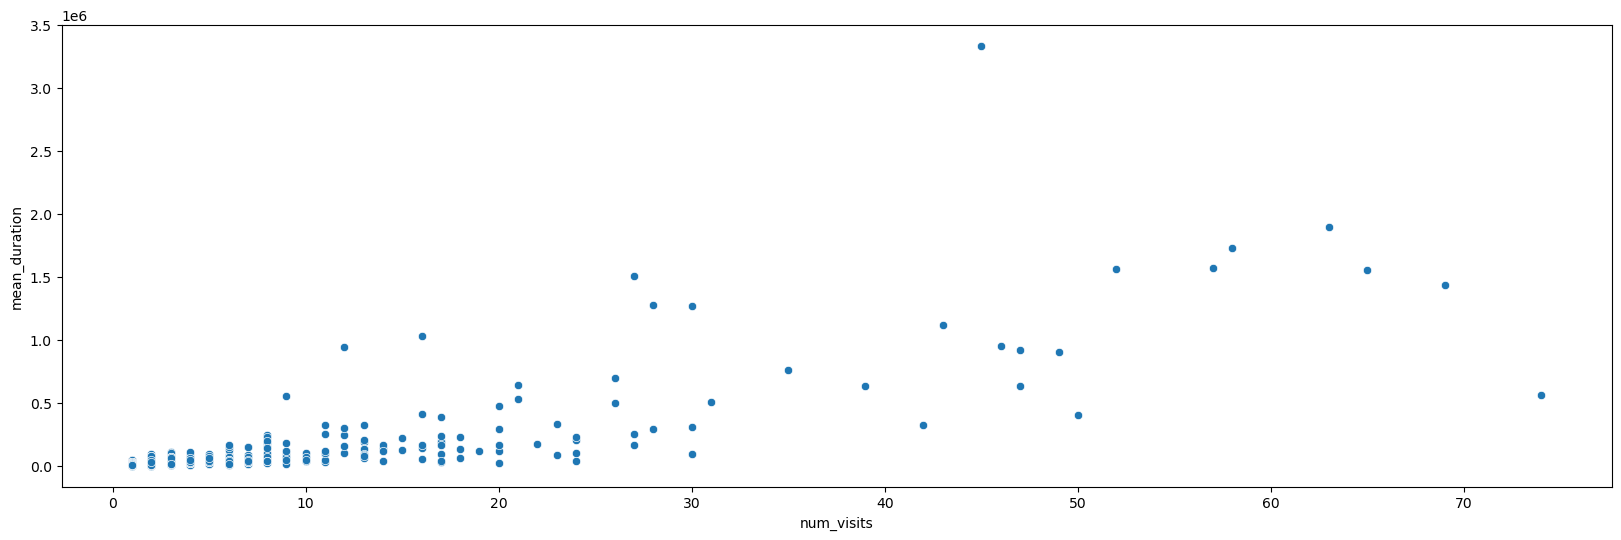

In [ ]:
plt.figure(figsize = (20, 6))
sn.scatterplot( data = visits_duration_df,
                x = 'num_visits',
                y = 'mean_duration' );

In [ ]:
moa_analytics_2016_df.head(10)

,device,session_date,apple_flag,entry_time,exit_time,duration,avg_time_session_update,distinct_ap,distinct_sessions,total_updates,...,session_updates_3_S,session_updates_3_SE,session_updates_3_SW,session_updates_3_W,session_updates_4_E,session_updates_4_NE,session_updates_4_S,session_updates_4_SE,session_updates_outside,session_updates_entrance
1,device:00:ee:bd:c2:2c:93,2016-03-26,0,2016-03-26 14:13:24.45,2016-03-26 18:57:53.54,17069.0,107.0,75,35,160,...,0,0,0,0,0,0,0,0,0,16
4,device:00:ee:bd:c2:37:17,2016-03-21,0,2016-03-21 17:49:45.72,2016-03-21 17:57:55.42,490.0,122.0,3,2,5,...,0,0,0,0,0,0,0,0,1,4
5,device:00:ee:bd:c2:49:ef,2016-01-02,0,2016-01-02 22:41:38.00,2016-01-02 22:56:03.03,865.0,45.0,17,2,20,...,8,0,6,6,0,0,0,0,3,2
7,device:00:ee:bd:c2:67:2a,2016-02-13,0,2016-02-13 11:32:12.51,2016-02-13 20:28:02.12,32150.0,175.0,31,43,184,...,9,0,0,0,0,0,0,0,0,3
8,device:00:ee:bd:c2:67:2a,2016-02-20,0,2016-02-20 15:40:39.14,2016-02-20 20:25:57.48,17118.0,178.0,22,14,97,...,5,0,0,0,0,0,0,0,0,5
10,device:00:f4:6f:76:9e:78,2016-01-25,0,2016-01-25 15:40:24.46,2016-01-25 19:21:51.98,13287.0,168.0,45,2,80,...,6,10,0,0,18,0,0,0,4,12
11,device:00:f4:6f:9b:f2:a7,2016-01-17,0,2016-01-17 19:10:01.53,2016-01-17 19:18:10.23,489.0,122.0,2,1,5,...,0,0,0,5,0,0,0,0,2,3
12,device:00:f4:6f:a2:ba:a5,2016-01-09,0,2016-01-09 17:30:15.52,2016-01-09 18:23:54.65,3219.0,91.0,20,2,36,...,0,5,0,0,1,0,0,1,8,4
14,device:04:4b:ed:06:7f:e1,2016-01-07,1,2016-01-07 16:14:30.46,2016-01-07 21:22:36.70,18486.0,116.0,50,13,160,...,3,4,0,0,0,0,4,0,2,9
17,device:04:4b:ed:06:ee:68,2016-01-30,1,2016-01-30 11:30:13.51,2016-01-30 15:57:02.28,16009.0,80.0,97,20,199,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
levels_time_cols = ['time_0',
                    'time_1',
                    'time_2',
                    'time_3',
                    'time_4']

In [ ]:
moa_analytics_2016_df = moa_analytics_2016_df.merge( visits_duration_df , on = 'device')

In [ ]:
duration_levels_df = (moa_analytics_2016_df[["device"] + levels_time_cols].groupby('device')
                      .sum()
                      .reset_index())

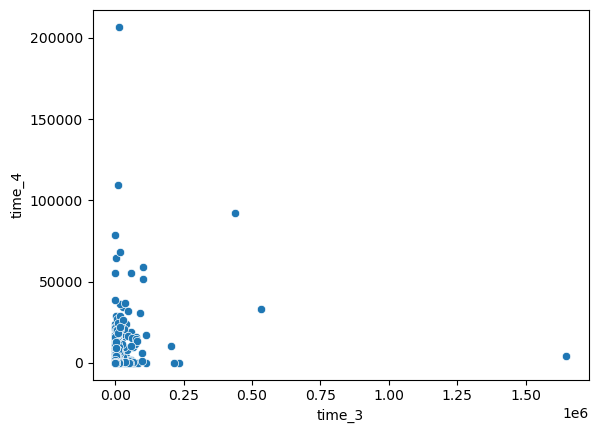

In [ ]:
sn.scatterplot(data = duration_levels_df,
               x = 'time_3',
               y = 'time_4' );

## Transforming the features

- Number of visits by each customer
- Median duration spent in the mall

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
levels_time_transformed = power_transform(duration_levels_df[levels_time_cols] + 1,
                                          method='box-cox',
                                          standardize=False)

In [ ]:
levels_time_transformed_df = pd.DataFrame(levels_time_transformed, columns=levels_time_cols)

In [ ]:
levels_time_transformed_df.head(5)

,time_0,time_1,time_2,time_3,time_4
0,0.000000,14.504845,0.000000,0.000000,0.000000
1,0.000000,11.829779,0.000000,0.000000,0.000000
2,0.000000,13.855315,6.992957,16.774878,0.000000
3,0.857092,32.103434,11.436969,28.655540,2.349124
4,0.000000,23.518055,8.835035,16.564918,3.171399


In [ ]:
duration_levels_df.sample(10)

,device,time_0,time_1,time_2,time_3,time_4
1199,device:68:d9:3c:d8:ac:4b,229.0,0.0,0.0,0.0,0
370,device:24:5f:df:78:38:60,0.0,0.0,396.0,0.0,0
2833,device:dc:2b:2a:9d:14:bd,0.0,9051.0,613.0,9224.0,0
1028,device:60:c5:47:8c:8a:6c,0.0,443.0,0.0,0.0,0
319,device:1c:1a:c0:c9:89:37,0.0,0.0,0.0,330.0,0
2150,device:a4:eb:d3:cf:e1:a6,0.0,1759.0,3433.0,2247.0,0
3070,device:ec:9b:f3:5b:4d:39,0.0,17607.0,508.0,793.0,7494
2678,device:d0:25:98:ed:dd:aa,0.0,1245.0,40.0,557.0,0
997,device:5c:ad:cf:0e:dc:98,2098.0,8409.0,4326.0,2797.0,7367
2667,device:d0:25:98:b5:74:56,0.0,0.0,0.0,3490.0,0


In [ ]:
#duration_levels_df['num_visits'] = (duration_levels_df['num_visits']
#                                    .apply(lambda x: (x - min_visits) / (max_visits - min_visits)))

In [ ]:
duration_levels_df.sample(10)

,device,time_0,time_1,time_2,time_3,time_4
2338,device:bc:4c:c4:bf:24:01,0.0,7964.0,6968.0,793.0,0
1410,device:70:ec:e4:68:aa:df,0.0,1189.0,230.0,6090.0,276
1842,device:94:e9:6a:97:8a:45,0.0,0.0,772.0,9663.0,617
1254,device:6c:72:e7:a7:f3:5b,0.0,2070.0,0.0,322.0,0
1691,device:90:3c:92:c9:11:f9,169320.0,8627.0,4940.0,3496.0,919
482,device:2c:44:01:cf:82:93,0.0,4278.0,0.0,398.0,0
2141,device:a4:db:30:e5:4e:aa,0.0,398.0,1170.0,3098.0,557
565,device:34:36:3b:80:95:6e,0.0,335.0,0.0,0.0,0
3457,device:fc:db:b3:3f:d8:ff,0.0,24608.0,942.0,10608.0,2397
2381,device:c0:1a:da:8b:61:49,0.0,4741.0,1047.0,2010.0,518


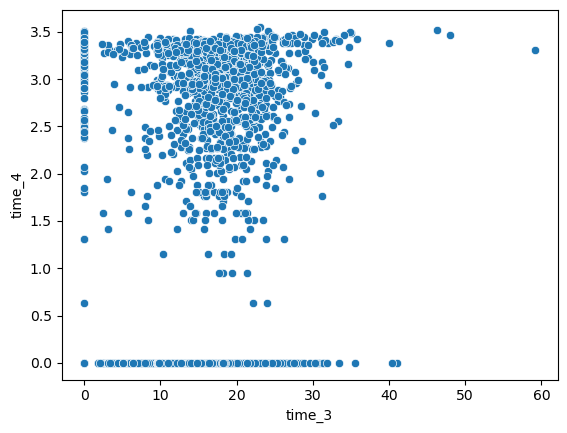

In [ ]:
sn.scatterplot(data = levels_time_transformed_df,
               x = 'time_3',
               y = 'time_4' );

## Clustering

In [ ]:
from sklearn.cluster import DBSCAN, HDBSCAN

In [ ]:
#hdbscan = DBSCAN(eps = 0.55, min_samples = 5, p = 4)

In [ ]:
hdbscan = HDBSCAN(min_cluster_size=50)

In [ ]:
hdbscan.fit(levels_time_transformed_df)

HDBSCAN(min_cluster_size=50)

In [ ]:
np.unique(hdbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

In [ ]:
duration_levels_df['cluster_id'] = hdbscan.labels_

In [ ]:
duration_levels_df.cluster_id.value_counts()

cluster_id
 1    1707
-1     920
 4     326
 3     267
 0     141
 2     100
 5      72
Name: count, dtype: int64

### Analyzing the clusters

<Axes: xlabel='cluster_id', ylabel='time_0'>

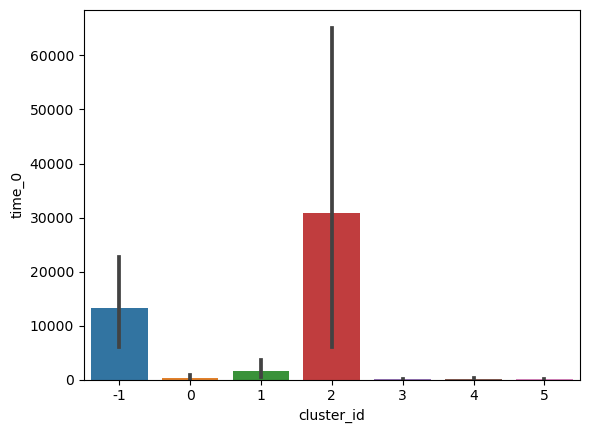

In [ ]:
sn.barplot( data = duration_levels_df,
            x = 'cluster_id',
            y = 'time_0',
            estimator = 'mean')

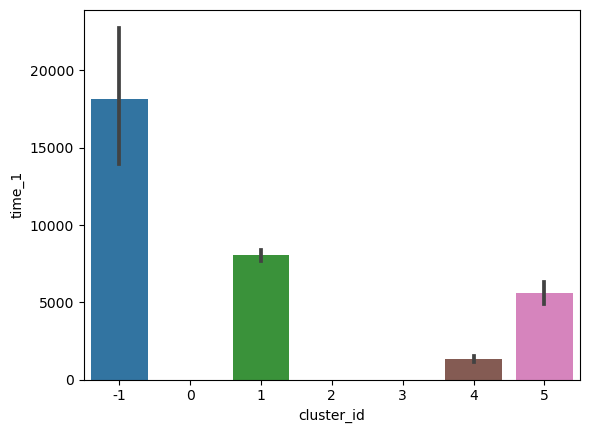

In [ ]:
sn.barplot( data = duration_levels_df,
            x = 'cluster_id',
            y = 'time_1',
            estimator = 'mean');

In [ ]:
duration_levels_df

,device,time_0,time_1,time_2,time_3,time_4,cluster_id
0,device:00:25:00:4c:70:ad,0.0,1250.0,0.0,0.0,0,4
1,device:00:56:cd:02:8a:05,0.0,564.0,0.0,0.0,0,4
2,device:00:56:cd:0b:c6:84,0.0,1041.0,188.0,2995.0,0,1
3,device:00:56:cd:10:f7:17,5494.0,41336.0,1824.0,37224.0,41,-1
4,device:00:56:cd:cd:80:a1,0.0,9823.0,516.0,2833.0,1412,1
...,...,...,...,...,...,...,...
3528,device:fc:e9:98:c6:2f:6a,0.0,3504.0,49.0,1878.0,366,1
3529,device:fc:e9:98:cc:1a:30,394.0,2315.0,0.0,554.0,330,-1
3530,device:fc:e9:98:da:e4:43,0.0,2799.0,8126.0,0.0,0,-1
3531,device:fc:f8:ae:5a:2d:e1,0.0,0.0,0.0,2685.0,0,3


In [ ]:
levels_unpivot_df = pd.melt(duration_levels_df[['cluster_id',
                                                'time_0',
                                                'time_1',
                                                'time_2',
                                                'time_3']],
                            id_vars=['cluster_id'],
                            value_vars = ['time_0',
                                          'time_1',
                                          'time_2',
                                          'time_3'])

In [ ]:
levels_unpivot_df

,cluster_id,variable,value
0,4,time_0,0.0
1,4,time_0,0.0
2,1,time_0,0.0
3,-1,time_0,5494.0
4,1,time_0,0.0
...,...,...,...
14127,1,time_3,1878.0
14128,-1,time_3,554.0
14129,-1,time_3,0.0
14130,3,time_3,2685.0


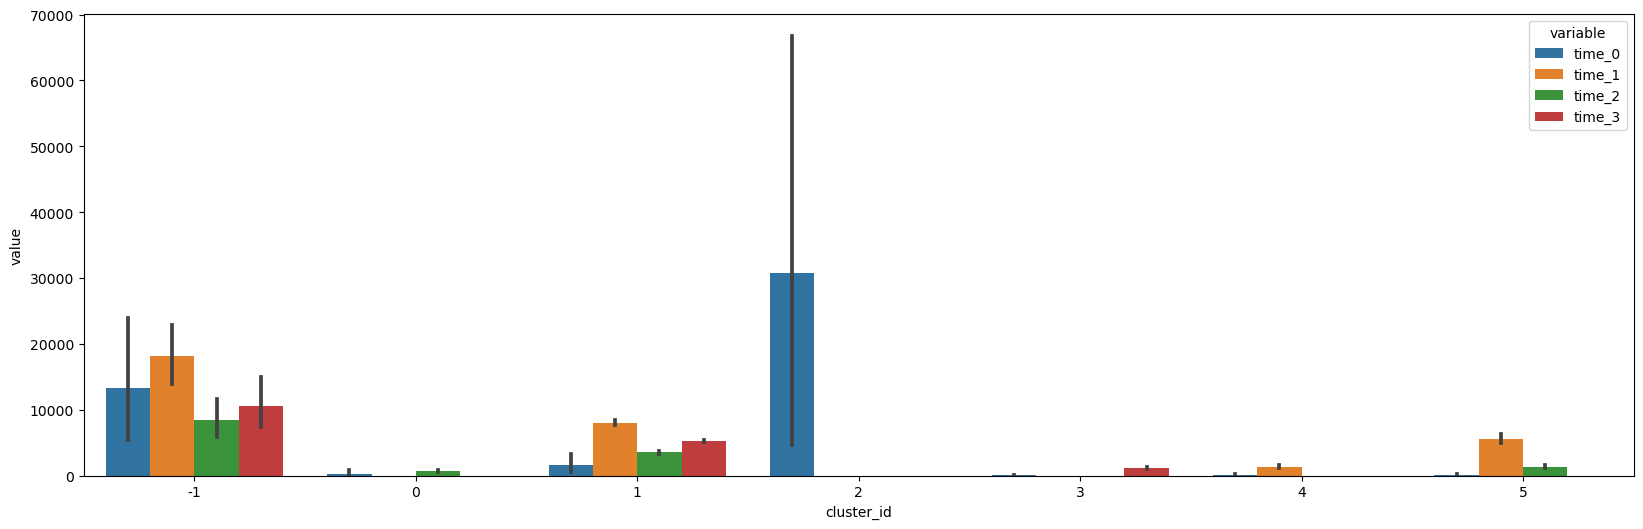

In [ ]:
plt.figure(figsize = (20, 6))
sn.barplot( data = levels_unpivot_df,
            x = 'cluster_id',
            y = 'value',
            hue = 'variable',
            estimator = 'mean');

### K-Means Cluster

In [ ]:
#!pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [ ]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), locate_elbow=False, timings=False)

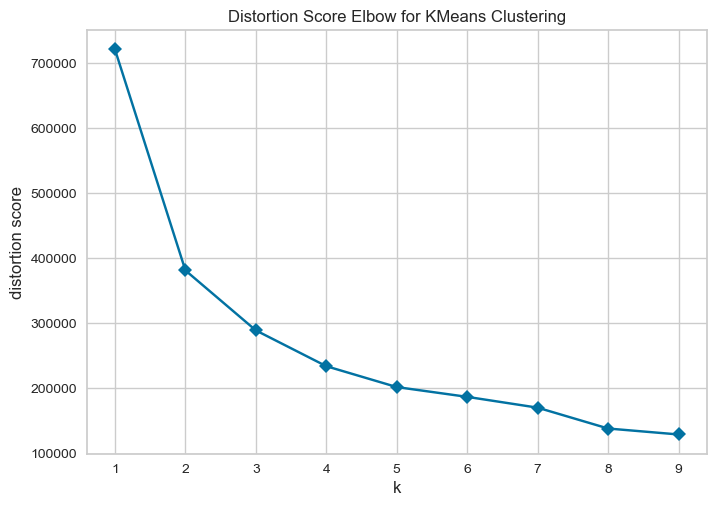

In [ ]:
visualizer.fit(levels_time_transformed_df)
visualizer.show();

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
cluster_range = range( 4, 8 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( levels_time_transformed_df )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(levels_time_transformed_df, clusters.labels_)}" )

n_cluster: 4 - CH Score: 2443.7184020582226
n_cluster: 5 - CH Score: 2288.4417768680446
n_cluster: 6 - CH Score: 2161.9699704637073
n_cluster: 7 - CH Score: 2116.336835037717


In [ ]:
kmeans_clusters = KMeans(n_clusters = 4, n_init='auto')

In [ ]:
kmeans_clusters.fit(levels_time_transformed_df)

KMeans(n_clusters=4, n_init='auto')

In [ ]:
np.unique(kmeans_clusters.labels_)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
duration_levels_df['kmeans_cluster_id'] = kmeans_clusters.labels_

In [ ]:
duration_levels_df['kmeans_cluster_id'].value_counts()

kmeans_cluster_id
0    1188
2     976
1     685
3     684
Name: count, dtype: int64

In [ ]:
kmeans_levels_unpivot_df = pd.melt(duration_levels_df[['kmeans_cluster_id'] + levels_time_cols],
                                   id_vars=['kmeans_cluster_id'],
                                   value_vars = ['time_0', 'time_1', 'time_2', 'time_3'])

In [ ]:
kmeans_levels_unpivot_df

,kmeans_cluster_id,variable,value
0,3,time_0,0.0
1,3,time_0,0.0
2,0,time_0,0.0
3,2,time_0,5494.0
4,2,time_0,0.0
...,...,...,...
14127,0,time_3,1878.0
14128,0,time_3,554.0
14129,3,time_3,0.0
14130,1,time_3,2685.0


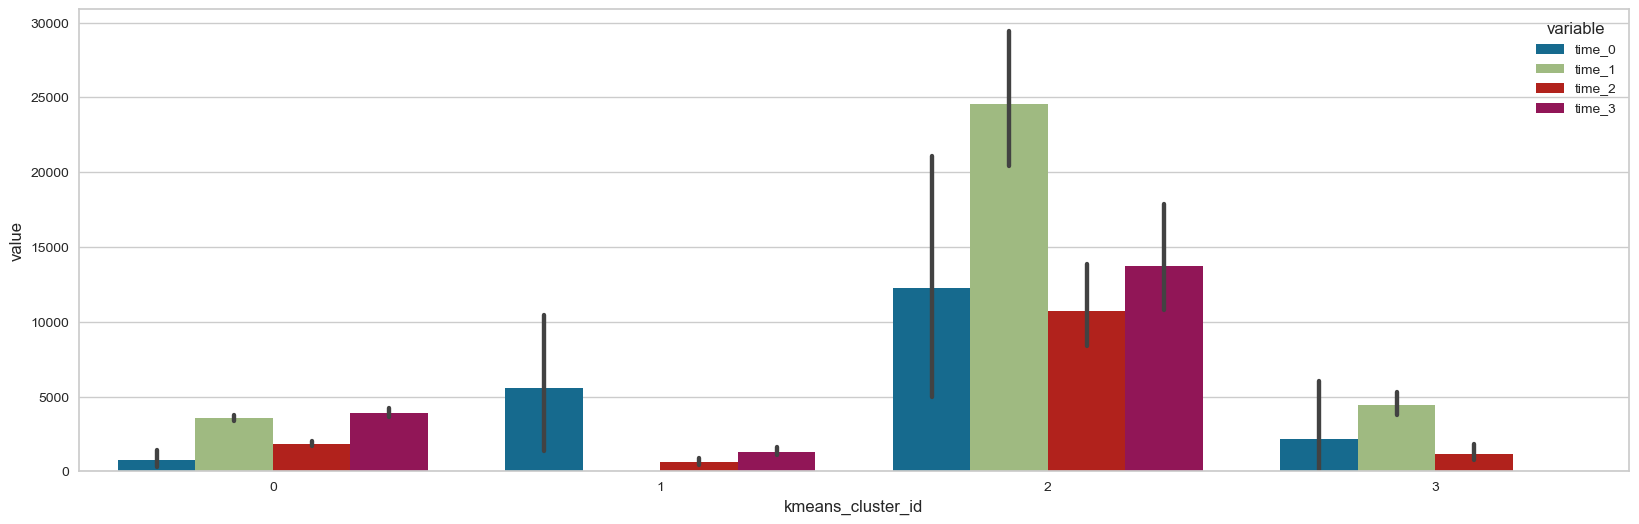

In [ ]:
plt.figure(figsize = (20, 6))
sn.barplot( data = kmeans_levels_unpivot_df,
            x = 'kmeans_cluster_id',
            y = 'value',
            hue = 'variable',
            estimator = 'mean');